In [1]:
import re
from tqdm import tqdm

import setup

In [2]:
#debug
setup.auth("test-algorithms")

"Testing algorithm 5(RSASHA1): 'OpenSSL RSA' ->'OpenSSL RSA' -> 'OpenSSL RSA' (2048 bits) Signature & verify ok, create 79223usec, signature 1066usec, verify 47usec\nTesting algorithm 7(RSASHA1-NSEC3-SHA1): 'OpenSSL RSA' ->'OpenSSL RSA' -> 'OpenSSL RSA' (2048 bits) Signature & verify ok, create 79386usec, signature 1281usec, verify 60usec\nTesting algorithm 8(RSASHA256): 'OpenSSL RSA' ->'OpenSSL RSA' -> 'OpenSSL RSA' (2048 bits) Signature & verify ok, create 74470usec, signature 1348usec, verify 60usec\nTesting algorithm 10(RSASHA512): 'OpenSSL RSA' ->'OpenSSL RSA' -> 'OpenSSL RSA' (2048 bits) Signature & verify ok, create 81654usec, signature 1213usec, verify 57usec\nTesting algorithm 13(ECDSAP256SHA256): 'OpenSSL ECDSA' ->'OpenSSL ECDSA' -> 'OpenSSL ECDSA' (256 bits) Signature & verify ok, create 31usec, signature 64usec, verify 207usec\nTesting algorithm 14(ECDSAP384SHA384): 'OpenSSL ECDSA' ->'OpenSSL ECDSA' -> 'OpenSSL ECDSA' (384 bits) Signature & verify ok, create 2156usec, signa

In [3]:
rexp = r"Testing algorithm (?P<alg_num>\d+)\((?P<alg_name>[a-zA-Z0-9\-]+)\): \'(?P<creator>[^\']*)\' ->\'(?P<signer>[^\']*)\' -> \'(?P<verifier>[^\']*)\' \((?P<alg_size>\d+) bits\) Signature \& verify ok, create (?P<time_create_usec>\d+)usec, signature (?P<time_sign_usec>\d+)usec, verify (?P<time_verify_usec>\d+)usec"
    
raw_data = [
    re.match(rexp, l).groupdict()
    for _ in tqdm(range(3))
    for l in setup.auth("test-algorithms").split("\n") if l
]

100%|███████████████████████| 3/3 [01:48<00:00, 36.16s/it]


In [4]:
import pandas as pd

In [5]:
data = pd.DataFrame(raw_data)
for c in ['alg_num', 'alg_size', 'time_create_usec', 'time_sign_usec', 'time_verify_usec']:
    data[c] = data[c].apply(int)
data

,alg_num,alg_name,creator,signer,verifier,alg_size,time_create_usec,time_sign_usec,time_verify_usec
0,5,RSASHA1,OpenSSL RSA,OpenSSL RSA,OpenSSL RSA,2048,86232,1072,43
1,7,RSASHA1-NSEC3-SHA1,OpenSSL RSA,OpenSSL RSA,OpenSSL RSA,2048,82517,986,46
2,8,RSASHA256,OpenSSL RSA,OpenSSL RSA,OpenSSL RSA,2048,69125,1041,46
3,10,RSASHA512,OpenSSL RSA,OpenSSL RSA,OpenSSL RSA,2048,78059,963,41
4,13,ECDSAP256SHA256,OpenSSL ECDSA,OpenSSL ECDSA,OpenSSL ECDSA,256,16,34,109
5,14,ECDSAP384SHA384,OpenSSL ECDSA,OpenSSL ECDSA,OpenSSL ECDSA,384,1681,1528,1307
6,15,ED25519,OpenSSL EDDSA,OpenSSL EDDSA,OpenSSL EDDSA,256,58,50,209
7,15,ED25519,OpenSSL EDDSA,OpenSSL EDDSA,Sodium ED25519,256,52,53,88
8,15,ED25519,OpenSSL EDDSA,Sodium ED25519,OpenSSL EDDSA,256,52,34,166
9,15,ED25519,OpenSSL EDDSA,Sodium ED25519,Sodium ED25519,256,102,55,86


In [6]:
mdata = data.melt(
    id_vars=['alg_num', 'alg_name', 'alg_size', 'creator', 'signer', 'verifier'], 
    value_vars=['time_create_usec', 'time_sign_usec', 'time_verify_usec'], 
    value_name='duration_usec'
)
mdata

,alg_num,alg_name,alg_size,creator,signer,verifier,variable,duration_usec
0,5,RSASHA1,2048,OpenSSL RSA,OpenSSL RSA,OpenSSL RSA,time_create_usec,86232
1,7,RSASHA1-NSEC3-SHA1,2048,OpenSSL RSA,OpenSSL RSA,OpenSSL RSA,time_create_usec,82517
2,8,RSASHA256,2048,OpenSSL RSA,OpenSSL RSA,OpenSSL RSA,time_create_usec,69125
3,10,RSASHA512,2048,OpenSSL RSA,OpenSSL RSA,OpenSSL RSA,time_create_usec,78059
4,13,ECDSAP256SHA256,256,OpenSSL ECDSA,OpenSSL ECDSA,OpenSSL ECDSA,time_create_usec,16
...,...,...,...,...,...,...,...,...
139,15,ED25519,256,Sodium ED25519,OpenSSL EDDSA,Sodium ED25519,time_verify_usec,98
140,15,ED25519,256,Sodium ED25519,Sodium ED25519,OpenSSL EDDSA,time_verify_usec,198
141,15,ED25519,256,Sodium ED25519,Sodium ED25519,Sodium ED25519,time_verify_usec,130
142,16,ED448,456,OpenSSL EDDSA,OpenSSL EDDSA,OpenSSL EDDSA,time_verify_usec,878


In [7]:
mdata['action'] = mdata['variable'].apply(lambda v: v.split('_')[1])
mdata['library'] = mdata.apply(lambda row: row[{'create': 'creator', 'sign': 'signer', 'verify': 'verifier'}[row['action']]], axis=1)
mdata['library'] = mdata['library'].replace({'OpenSSL PQC': 'OQS/OpenSSL'})
mdata['library'] = mdata['library'].apply(lambda lib: lib.split(' ', 1)[0])
mdata['library'] = mdata['library'].replace({'OpenSSL': 'OQS/OpenSSL'})
mdata['algorithm'] = mdata.apply(lambda row: f"{row['alg_name']} {row['alg_size']}bits\n[{row['library']}]", axis=1)
mdata[['library', 'algorithm', 'action', 'duration_usec']]

,library,algorithm,action,duration_usec
0,OQS/OpenSSL,RSASHA1 2048bits\n[OQS/OpenSSL],create,86232
1,OQS/OpenSSL,RSASHA1-NSEC3-SHA1 2048bits\n[OQS/OpenSSL],create,82517
2,OQS/OpenSSL,RSASHA256 2048bits\n[OQS/OpenSSL],create,69125
3,OQS/OpenSSL,RSASHA512 2048bits\n[OQS/OpenSSL],create,78059
4,OQS/OpenSSL,ECDSAP256SHA256 256bits\n[OQS/OpenSSL],create,16
...,...,...,...,...
139,Sodium,ED25519 256bits\n[Sodium],verify,98
140,OQS/OpenSSL,ED25519 256bits\n[OQS/OpenSSL],verify,198
141,Sodium,ED25519 256bits\n[Sodium],verify,130
142,OQS/OpenSSL,ED448 456bits\n[OQS/OpenSSL],verify,878


In [8]:
import seaborn as sns

sns.set(font_scale=2)
sns.set_style('whitegrid')

In [9]:
ALGORITHM_COLORS = {
    'RSASHA1 2048bits\n[OQS/OpenSSL]': '#ff0000',
    'RSASHA1-NSEC3-SHA1 2048bits\n[OQS/OpenSSL]': '#dd0000',
    'RSASHA256 2048bits\n[OQS/OpenSSL]': '#bb0000',
    'RSASHA512 2048bits\n[OQS/OpenSSL]': '#990000',
    'ECDSAP256SHA256 256bits\n[OQS/OpenSSL]': '#00ff00',
    'ECDSAP384SHA384 384bits\n[OQS/OpenSSL]': '#00dd00',
    'ED25519 256bits\n[OQS/OpenSSL]': '#0000ff',
    'ED25519 256bits\n[Sodium]': '#0000dd',
    'ED448 456bits\n[OQS/OpenSSL]': '#0000bb',
    'falcon 10248bits\n[OQS/OpenSSL]': '#00ffff',
}
ALGORITHM_ORDER = list(ALGORITHM_COLORS.keys())
ALGORITHM_PALETTE = sns.color_palette([ALGORITHM_COLORS[a] for a in ALGORITHM_ORDER])

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


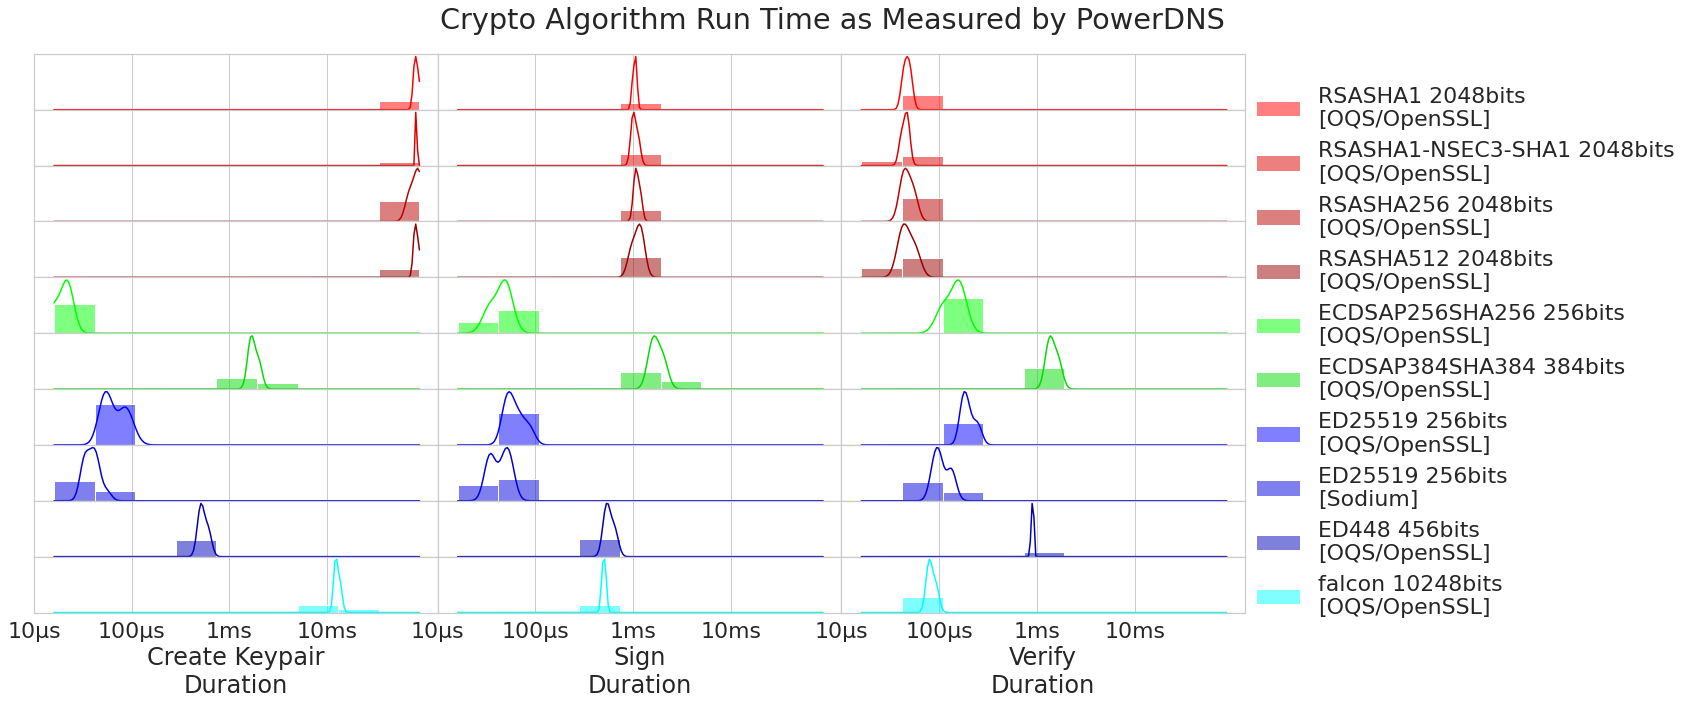

In [10]:
g = sns.displot(
    data=mdata,
    x='duration_usec',
    row='algorithm', col='action',
    hue='algorithm', hue_order=ALGORITHM_ORDER, palette=ALGORITHM_PALETTE,
    log_scale=(True, False),
    height=.9,
    aspect=6/.9,
    facet_kws=dict(legend_out=True, margin_titles=False, despine=False, sharey=False),
    kind='hist',
    kde=True,    
)
g.set(
    #xlim=(1*1e-3, 1e-1), 
    ylabel='', 
    yticks=[],
    xticks=[10, 100, 1000, 10000],
    xticklabels=["10µs", "100µs", "1ms", "10ms"],
    title='',
)

for ax, label in zip(g.axes[-1, :], ['Create Keypair', 'Sign', 'Verify']):
    ax.set_xlabel(f'{label}\nDuration')
    
g.figure.suptitle('Crypto Algorithm Run Time as Measured by PowerDNS', y=1.02)
g.figure.subplots_adjust(wspace=0, hspace=0)
g.legend.set_title('')
g.legend.set_zorder(1)
g.savefig('data/crypto_times_indv.pdf')